In [1]:
import pandas as pd  
import os                
from datetime import datetime
import time
import matplotlib.pyplot as plt
from math import sin, cos, tan
import matplotlib.dates as mdates

In [2]:
#Creating individual dataframe instances of the CSVs to check for any differences. 
csv2021q1 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2021Q1_RE_Sales.csv")
csv2021q2 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2021Q2_RE_Sales.csv")
csv2021q3 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2021Q3_RE_Sales.csv")
csv2021q4 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2021Q4_RE_Sales.csv")
csv2022q1 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2022Q1_RE_Sales.csv")
csv2022q2 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2022Q2_RE_Sales.csv")
csv2022q3 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2022Q3_RE_Sales.csv")
csv2022q4 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2022Q4_RE_Sales.csv")
csv2023q1 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2023Q1_RE_Sales.csv")
csv2023q2 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2023Q2_RE_Sales.csv")
csv2023q3 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2023Q3_RE_Sales.csv")
csv2023q4 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2023Q4_RE_Sales.csv")
csv2024q1 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2024Q1_RE_Sales.csv")
csv2024q2 = pd.read_csv("../Real-Estate-Analysis-Project/Data/2024Q2_RE_Sales_incomplete.csv")

#Putting the dataframes into a list so I can make a function to check
data_frames = [
    csv2021q1, csv2021q2, csv2021q3, csv2021q4,
    csv2022q1, csv2022q2, csv2022q3, csv2022q4,
    csv2023q1, csv2023q2, csv2023q3, csv2023q4,
    csv2024q1, csv2024q2
]

#now to make the function to check
for i, df in enumerate(data_frames, start=1):
    print(f"DataFrame {i} structure:")
    df.info()
    print("\n---\n")
#2nd print statement for clarity purposes between dfs

DataFrame 1 structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11313 entries, 0 to 11312
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   MLS #                   11313 non-null  object
 1   Class                   11313 non-null  object
 2   Property Type           11313 non-null  object
 3   Address                 11313 non-null  object
 4   City                    11313 non-null  object
 5   Zip                     11313 non-null  object
 6   Neighborhood            597 non-null    object
 7   Subdivision             10258 non-null  object
 8   Bedrooms                11313 non-null  int64 
 9   Total Baths             11313 non-null  int64 
 10  Total Living Area SqFt  11313 non-null  object
 11  Acres                   10844 non-null  object
 12  Year Built              11313 non-null  int64 
 13  List Date               11313 non-null  object
 14  Closing Date            11313 n

##### Column structure is consistent across all DFs. 
##### Dataframe 2 (2021q2) contains the largest set of data at 14862 entries.
##### Dataframe 3 (2021q3) comes in at close second at 14693 entries. 
##### 18 columns for each Df. 


In [3]:
# Directory where your files are located
directory = './Data/'
dfs = []

#loop through all the files in a data directory
for filename in os.listdir(directory):
    #ignore a file start with the name weekly, thats the mortageg rates data 
    if not filename.startswith("weekly"):
        #read file path 
        filepath = os.path.join(directory, filename)
        #read a file in a dataframe
        df = pd.read_csv(filepath)
        #append the file in dictionary 
        dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)    
combined_df.head()

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977.0,2/9/2021,3/11/2021,9,"$79,900",$79
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934.0,11/22/2020,1/12/2021,13,"$40,000","$15,000"
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995.0,4/21/2020,2/1/2021,254,"$36,000","$17,000"
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998.0,4/21/2020,2/1/2021,254,"$29,000","$17,000"
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940.0,1/7/2020,1/25/2021,357,"$22,000","$18,500"


In [4]:
#Checking how many values are null per column
combined_df.isnull().sum()

MLS #                          0
Class                          0
Property Type                  0
Address                        0
City                           0
Zip                           42
Neighborhood              155784
Subdivision                17151
Bedrooms                      18
Total Baths                    0
Total Living Area SqFt         0
Acres                      10162
Year Built                    17
List Date                      0
Closing Date                   0
Days On Market                 0
List Price                     0
Sold Price                     0
dtype: int64

In [5]:
#Checking basic structure of df
combined_df.shape

(162138, 18)

##### 162138 rows
##### 18 columns

In [6]:
#Checking data types of the columns
combined_df.dtypes

MLS #                      object
Class                      object
Property Type              object
Address                    object
City                       object
Zip                        object
Neighborhood               object
Subdivision                object
Bedrooms                  float64
Total Baths                 int64
Total Living Area SqFt     object
Acres                      object
Year Built                float64
List Date                  object
Closing Date               object
Days On Market              int64
List Price                 object
Sold Price                 object
dtype: object

##### Zipcode should stay as object due to certain areas formatting for zip codes such as 27006-8256
##### Total living area sqft is currently an object--Should be a float?
##### Should convert year built, list date, closing date to date time format rather than float/objects. 
##### List price and sold price columns should be converted to floats and have "$" stripped for graphing/numerical purposes.
##### Acres should be converted to float and have "Acres" stripped for same reason as list price. 

In [7]:

# Due the existence of 17 null values in the "Year Built" column we should convert these values to floats with a value of "0"
#   prior to the conversion to datetime to avoid any errors. 
combined_df['Year Built'] = combined_df['Year Built'].fillna(0).astype(float)
#Here I convert the recently converted columns that now contain "0" to "0000" for a more seamless datetime conversion.
#   For now we will assume empty columns contain the value "0000". This must be reconsidered for any impact it might have on future analytics. 
combined_df['Year Built'] = combined_df['Year Built'].replace('0', '0000')

# converting "Year Built" from float to datetime. For now I am assuming jan 1 for the day/month
combined_df['Year Built'] = pd.to_datetime(combined_df['Year Built'], format='%Y', errors='coerce')

# converting list date and closing date from str to datetime format. 
combined_df['List Date'] = pd.to_datetime(combined_df['List Date'], format='%m/%d/%Y')
combined_df['Closing Date'] = pd.to_datetime(combined_df['Closing Date'], format='%m/%d/%Y')

In [8]:
combined_df.dtypes

MLS #                             object
Class                             object
Property Type                     object
Address                           object
City                              object
Zip                               object
Neighborhood                      object
Subdivision                       object
Bedrooms                         float64
Total Baths                        int64
Total Living Area SqFt            object
Acres                             object
Year Built                datetime64[ns]
List Date                 datetime64[ns]
Closing Date              datetime64[ns]
Days On Market                     int64
List Price                        object
Sold Price                        object
dtype: object

In [9]:
combined_df

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977-01-01,2021-02-09,2021-03-11,9,"$79,900",$79
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934-01-01,2020-11-22,2021-01-12,13,"$40,000","$15,000"
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995-01-01,2020-04-21,2021-02-01,254,"$36,000","$17,000"
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998-01-01,2020-04-21,2021-02-01,254,"$29,000","$17,000"
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940-01-01,2020-01-07,2021-01-25,357,"$22,000","$18,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162133,10008718,RESIDENTIAL,Single Family Residence,5145 Avalaire Oaks Drive,Raleigh,27614,NaN,Avalaire,5.0,7,"7,329",1-2.9 Acres,2017-01-01,2024-01-30,2024-04-02,23,"$3,300,000","$2,975,000"
162134,10005946,RESIDENTIAL,Single Family Residence,108 Fairway Valley Court,Cary,27513,Preston,Preston Estates,5.0,7,"8,036",.76-.99 Acres,1997-01-01,2024-01-12,2024-04-30,56,"$4,400,000","$3,900,000"
162135,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,NaN,The Hills of Rosemont,5.0,9,"10,850",6-10.9 Acres,2008-01-01,2022-09-08,2024-05-01,587,"$4,995,000","$4,415,000"
162136,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,NaN,North Ridge,4.0,6,"5,951",.51-.75 Acres,2023-01-01,2023-12-22,2024-04-11,0,"$5,500,000","$5,000,000"


##### I am receiving a key error on List Price and Sold Price and have tried copy pasting among other methods so my assumption is that there might be hidden characters or leading spaces.
#####       For this reason I will be renaming the columns manually to ensure they are contingent with our eyes. 

In [10]:
#Obtaining index values of columns. 
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162138 entries, 0 to 162137
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   MLS #                   162138 non-null  object        
 1   Class                   162138 non-null  object        
 2   Property Type           162138 non-null  object        
 3   Address                 162138 non-null  object        
 4   City                    162138 non-null  object        
 5   Zip                     162096 non-null  object        
 6   Neighborhood            6354 non-null    object        
 7   Subdivision             144987 non-null  object        
 8   Bedrooms                162120 non-null  float64       
 9   Total Baths             162138 non-null  int64         
 10  Total Living Area SqFt  162138 non-null  object        
 11  Acres                   151976 non-null  object        
 12  Year Built              162086

In [11]:
#confirming that index values are correct
print(f"List price should equal {combined_df.columns[16]} and Sold price should equal {combined_df.columns[17]}")

List price should equal List Price and Sold price should equal Sold Price


In [12]:
combined_df.rename(columns={combined_df.columns[16]: "List Price"}, inplace=True)
combined_df.rename(columns={combined_df.columns[17]: "Sold Price"}, inplace=True)
combined_df


,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977-01-01,2021-02-09,2021-03-11,9,"$79,900",$79
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934-01-01,2020-11-22,2021-01-12,13,"$40,000","$15,000"
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995-01-01,2020-04-21,2021-02-01,254,"$36,000","$17,000"
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998-01-01,2020-04-21,2021-02-01,254,"$29,000","$17,000"
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940-01-01,2020-01-07,2021-01-25,357,"$22,000","$18,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162133,10008718,RESIDENTIAL,Single Family Residence,5145 Avalaire Oaks Drive,Raleigh,27614,NaN,Avalaire,5.0,7,"7,329",1-2.9 Acres,2017-01-01,2024-01-30,2024-04-02,23,"$3,300,000","$2,975,000"
162134,10005946,RESIDENTIAL,Single Family Residence,108 Fairway Valley Court,Cary,27513,Preston,Preston Estates,5.0,7,"8,036",.76-.99 Acres,1997-01-01,2024-01-12,2024-04-30,56,"$4,400,000","$3,900,000"
162135,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,NaN,The Hills of Rosemont,5.0,9,"10,850",6-10.9 Acres,2008-01-01,2022-09-08,2024-05-01,587,"$4,995,000","$4,415,000"
162136,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,NaN,North Ridge,4.0,6,"5,951",.51-.75 Acres,2023-01-01,2023-12-22,2024-04-11,0,"$5,500,000","$5,000,000"


In [13]:
combined_df["List Price"] = combined_df["List Price"].str.replace("$", "").str.replace(',', '').astype(float)
combined_df["Sold Price"] = combined_df["Sold Price"].str.replace("$", "").str.replace(',', '').astype(float)

combined_df

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977-01-01,2021-02-09,2021-03-11,9,79900.0,79.0
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934-01-01,2020-11-22,2021-01-12,13,40000.0,15000.0
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995-01-01,2020-04-21,2021-02-01,254,36000.0,17000.0
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998-01-01,2020-04-21,2021-02-01,254,29000.0,17000.0
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940-01-01,2020-01-07,2021-01-25,357,22000.0,18500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162133,10008718,RESIDENTIAL,Single Family Residence,5145 Avalaire Oaks Drive,Raleigh,27614,NaN,Avalaire,5.0,7,"7,329",1-2.9 Acres,2017-01-01,2024-01-30,2024-04-02,23,3300000.0,2975000.0
162134,10005946,RESIDENTIAL,Single Family Residence,108 Fairway Valley Court,Cary,27513,Preston,Preston Estates,5.0,7,"8,036",.76-.99 Acres,1997-01-01,2024-01-12,2024-04-30,56,4400000.0,3900000.0
162135,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,NaN,The Hills of Rosemont,5.0,9,"10,850",6-10.9 Acres,2008-01-01,2022-09-08,2024-05-01,587,4995000.0,4415000.0
162136,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,NaN,North Ridge,4.0,6,"5,951",.51-.75 Acres,2023-01-01,2023-12-22,2024-04-11,0,5500000.0,5000000.0


##### List price and sold price have successfully been renamed and converted to floats.
#####
##### Now I will do the same conversion for acres. 
##### Since acres is a range value it is not possible to display this in a single column as floats are single numeric values. 
##### For this reason I will be splitting the acres column into two separate columns, one for min and one for max.  
##### We can average these two columns for graphing purposes. 

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162138 entries, 0 to 162137
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   MLS #                   162138 non-null  object        
 1   Class                   162138 non-null  object        
 2   Property Type           162138 non-null  object        
 3   Address                 162138 non-null  object        
 4   City                    162138 non-null  object        
 5   Zip                     162096 non-null  object        
 6   Neighborhood            6354 non-null    object        
 7   Subdivision             144987 non-null  object        
 8   Bedrooms                162120 non-null  float64       
 9   Total Baths             162138 non-null  int64         
 10  Total Living Area SqFt  162138 non-null  object        
 11  Acres                   151976 non-null  object        
 12  Year Built              162086

In [15]:
combined_df.rename(columns={combined_df.columns[11]: "Acres"}, inplace=True)
#Key value error prevention. It seems some column names contain trailing spaces or hidden characters so i'm just going to do this ahead of time. 

In [16]:
def split_range(range_str):
    if isinstance(range_str, str):
        range_str = range_str.strip()  # removes leading/trailing whitespace
        if range_str.endswith('+'):
            range_str = range_str[:-1].strip()  # removes trailing '+' and any whitespace
        parts = range_str.split('-')
        if len(parts) == 1:
            return [float(parts[0]), float('inf')]  # use infinity for upper bound on values such as "11+" which is an error I received when creating this function. I think Python assumes 11+ means 11-infinity.
        else:
            return [float(parts[0]), float(parts[1])]
    else:
        return [float('nan'), float('nan')]
combined_df[['Acres_min', 'Acres_max']] = combined_df['Acres'].str.replace(' Acres', '').apply(split_range).tolist()

In [17]:
combined_df

,MLS #,Class,Property Type,Address,City,Zip,Neighborhood,Subdivision,Bedrooms,Total Baths,Total Living Area SqFt,Acres,Year Built,List Date,Closing Date,Days On Market,List Price,Sold Price,Acres_min,Acres_max
0,LP649830,RESIDENTIAL,Single Family Residence,2263 Shaw Rd Extension,Fayetteville,28311,NaN,NaN,3.0,1,0,NaN,1977-01-01,2021-02-09,2021-03-11,9,79900.0,79.0,NaN,NaN
1,2354950,RESIDENTIAL,Single Family Residence,97 Allie Clay Road,Roxboro,27573,NaN,Not in a Subdivision,3.0,1,"1,118",.51-.75 Acres,1934-01-01,2020-11-22,2021-01-12,13,40000.0,15000.0,0.51,0.75
2,LP630668,RESIDENTIAL,Manufactured,146 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1995-01-01,2020-04-21,2021-02-01,254,36000.0,17000.0,NaN,NaN
3,LP630661,RESIDENTIAL,Manufactured,163 Ralph Hunt Boulevard,Orrum,28369,NaN,NaN,3.0,2,0,NaN,1998-01-01,2020-04-21,2021-02-01,254,29000.0,17000.0,NaN,NaN
4,LP624150,RESIDENTIAL,Single Family Residence,405 Mcleod Road,Red Springs,28377,NaN,NaN,2.0,1,0,NaN,1940-01-01,2020-01-07,2021-01-25,357,22000.0,18500.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162133,10008718,RESIDENTIAL,Single Family Residence,5145 Avalaire Oaks Drive,Raleigh,27614,NaN,Avalaire,5.0,7,"7,329",1-2.9 Acres,2017-01-01,2024-01-30,2024-04-02,23,3300000.0,2975000.0,1.00,2.90
162134,10005946,RESIDENTIAL,Single Family Residence,108 Fairway Valley Court,Cary,27513,Preston,Preston Estates,5.0,7,"8,036",.76-.99 Acres,1997-01-01,2024-01-12,2024-04-30,56,4400000.0,3900000.0,0.76,0.99
162135,2473018,RESIDENTIAL,Single Family Residence,250 Blue Violet Way,Durham,27713,NaN,The Hills of Rosemont,5.0,9,"10,850",6-10.9 Acres,2008-01-01,2022-09-08,2024-05-01,587,4995000.0,4415000.0,6.00,10.90
162136,10003230,RESIDENTIAL,Single Family Residence,1711 Hunting Ridge Road,Raleigh,27615,NaN,North Ridge,4.0,6,"5,951",.51-.75 Acres,2023-01-01,2023-12-22,2024-04-11,0,5500000.0,5000000.0,0.51,0.75


In [18]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162138 entries, 0 to 162137
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   MLS #                   162138 non-null  object        
 1   Class                   162138 non-null  object        
 2   Property Type           162138 non-null  object        
 3   Address                 162138 non-null  object        
 4   City                    162138 non-null  object        
 5   Zip                     162096 non-null  object        
 6   Neighborhood            6354 non-null    object        
 7   Subdivision             144987 non-null  object        
 8   Bedrooms                162120 non-null  float64       
 9   Total Baths             162138 non-null  int64         
 10  Total Living Area SqFt  162138 non-null  object        
 11  Acres                   151976 non-null  object        
 12  Year Built              162086

In [19]:
combined_df["Total Living Area SqFt"] = combined_df["Total Living Area SqFt"].str.replace(",", "").astype(float)

In [20]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162138 entries, 0 to 162137
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   MLS #                   162138 non-null  object        
 1   Class                   162138 non-null  object        
 2   Property Type           162138 non-null  object        
 3   Address                 162138 non-null  object        
 4   City                    162138 non-null  object        
 5   Zip                     162096 non-null  object        
 6   Neighborhood            6354 non-null    object        
 7   Subdivision             144987 non-null  object        
 8   Bedrooms                162120 non-null  float64       
 9   Total Baths             162138 non-null  int64         
 10  Total Living Area SqFt  162138 non-null  float64       
 11  Acres                   151976 non-null  object        
 12  Year Built              162086

### Graphing List price over time

In [21]:
#here I am filtering the data frame so that the graph only displays 2021-now. I had some issues while graphing where the graph was going all the way back to 1978 so it is necessary to filter
filtered_df = combined_df[(combined_df['List Date'] >= pd.Timestamp('2021-01-01')) & (combined_df['List Date'] <= pd.Timestamp.now())]

#here i am grouping the data by months so that it is easier for us to read. When I plotted it without grouping it resulted in a graph that looks like I had given a monkey a pencil and told it to draw the mona lisa.
monthly_data = filtered_df.resample('M', on='List Date').agg({'List Price': ['sum', 'count']})
monthly_data.columns = ['Total List Price', 'Total Properties Listed']

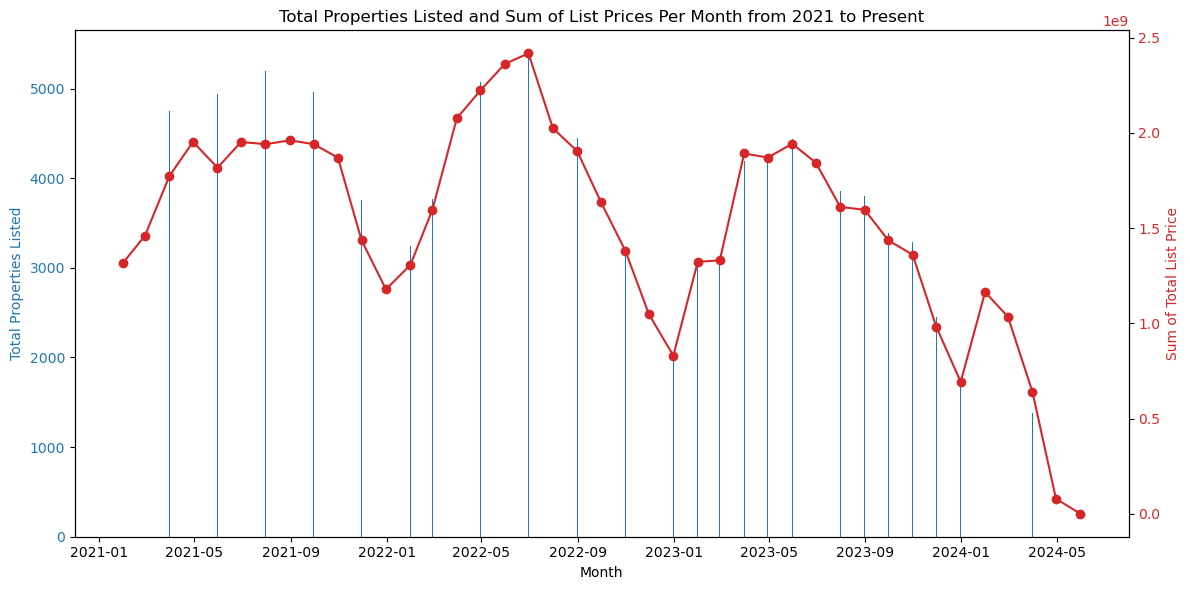

In [23]:
#setting the fig size. had to play around a bit to find a good fit.
fig, ax1 = plt.subplots(figsize=(12, 6))

# bar chart that displays total properties listed per month.
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Properties Listed', color=color)
ax1.bar(monthly_data.index, monthly_data['Total Properties Listed'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Total Properties Listed and Sum of Total List Prices Per Month from 2021 to Present')



# twin axes for the sum of the list prices
# telling the program that the axes will be plotted on the same graph. 
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Sum of Total List Price', color=color)
ax2.plot(monthly_data.index, monthly_data['Total List Price'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)


#tightening the layout
fig.tight_layout()  
plt.show()